In [4]:
import sys

import matplotlib.pyplot as plt
import json

# import dysts
# from dysts.flows import *
# from dysts.base import *
# from dysts.utils import *
# from dysts.analysis import *


import pandas as pd
import dysts
from dysts.datasets import *
from dysts.utils import *



try:
    from degas import *
except:
    pass


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Total models being analyzed is 131.


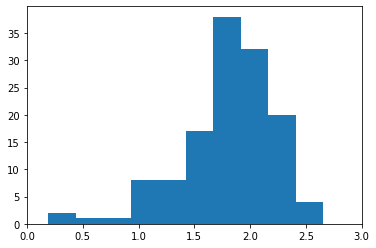

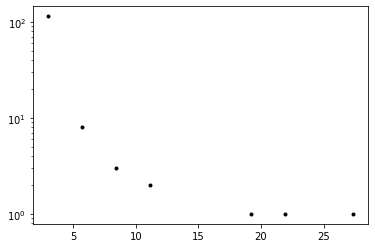

In [3]:
data_path = dysts.data_path

with open(data_path, "r") as file:
    data = json.load(file)
print(f"Total models being analyzed is {len(data.keys())}.")


all_lyapunov = list()
all_correlation_dimensions = list()
all_kaplan_yorke_dimensions = list()
all_dynamical_dimensions = list()
for item in data:
    all_lyapunov.append(data[item]["maximum_lyapunov_estimated"] * data[item]["period"])
    all_correlation_dimensions.append(data[item]["correlation_dimension"])
    all_kaplan_yorke_dimensions.append(data[item]["kaplan_yorke_dimension"])
    all_dynamical_dimensions.append(len(data[item]["initial_conditions"]))

plt.figure()
plt.hist(all_correlation_dimensions)
plt.xlim([0, 3])

plt.figure()
histvals, bins = np.histogram(all_lyapunov)
plt.semilogy(3 + bins[:-1], histvals, '.k')

In [176]:
INPUT_PATH = "dysts/data/dataset_univariate__pts_per_period_100__periods_10.json"
with open(INPUT_PATH, "r") as file:
    data = json.load(file)
# all_indices = np.array(list(data.keys()))
# all_series = np.vstack([data[item]["time"] for item in data])

In [18]:

INPUT_PATH = "dysts/data/dataset_univariate__pts_per_period_15__periods_10.json"
with open(INPUT_PATH, "r") as file:
    data = json.load(file)
np.vstack([data[item]["values"] for item in data])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 4 has size 5

In [24]:







# INPUT_PATH = "dysts/data/dataset_univariate__pts_per_period_15__periods_10.json"
# with open(INPUT_PATH, "r") as file:
#     data = json.load(file)
    
# all_series = np.vstack([data[item]["values"] for item in data])

# all_series -= np.mean(all_series, axis=1, keepdims=True)
# all_series /= np.std(all_series, axis=1, keepdims=True)

# all_series = all_series[:, 2:902]


# plt.plot(all_series.T[:20]);








# all_df = list()
# for i in range(len(all_series)):
#     series_arr = all_series[i]
#     series_pd = pd.DataFrame(np.vstack([i * np.ones(len(series_arr)), np.arange(len(series_arr)), series_arr]).T, columns=["id", "time", "value"])
#     all_df.append(series_pd)
    
# #     if i > 10:
# #         break
    
# all_datasets = pd.concat(
#     all_df,
#     axis=0,
#     join="outer",
#     ignore_index=False,
#     keys=None,
#     levels=None,
#     names=None,
#     verify_integrity=False,
#     copy=True,
# )    


dataset = TimeSeriesDataset("dysts/data/train_univariate__pts_per_period_15__periods_10.json")
feature_df = featurize_timeseries(dataset)


# all_datasets = dataset.to_pandas(standardize=True)

# extracted_features = extract_features(all_datasets, column_id="id", column_sort="time")
# feat_arr = extracted_features.to_numpy()

# filter_nans = ~np.isnan(np.mean(feat_arr, axis=0))

# feat_names = np.array(list(extracted_features.columns))[filter_nans]
# feat_arr = feat_arr[:, filter_nans]
# feat_arr = (feat_arr - np.mean(feat_arr, axis=0))

# filter_nonvarying = (np.std(feat_arr, axis=0) > 0)

# feat_names = feat_names[filter_nonvarying]
# feat_arr = feat_arr[:, filter_nonvarying]


## now pick top-k features with lowest variance among replicates or different timepoints

Feature Extraction: 100%|██████████| 33/33 [00:03<00:00,  8.57it/s]


In [25]:
feature_df

,values__variance_larger_than_standard_deviation,values__sum_values,values__abs_energy,values__mean_abs_change,values__mean_change,values__mean_second_derivative_central,values__median,values__mean,values__standard_deviation,values__variance,...,values__permutation_entropy__dimension_4__tau_1,values__permutation_entropy__dimension_5__tau_1,values__permutation_entropy__dimension_6__tau_1,values__permutation_entropy__dimension_7__tau_1,"values__matrix_profile__feature_""min""__threshold_0.98","values__matrix_profile__feature_""max""__threshold_0.98","values__matrix_profile__feature_""mean""__threshold_0.98","values__matrix_profile__feature_""median""__threshold_0.98","values__matrix_profile__feature_""25""__threshold_0.98","values__matrix_profile__feature_""75""__threshold_0.98"
Aizawa,-0.366412,-1.053017e-15,-5.684342e-14,0.050303,0.001128,-0.000975,0.043632,-7.020113e-18,-2.220446e-16,-3.330669e-16,...,0.041729,0.065414,0.142833,0.212270,-0.334874,-2.879754,-1.565879,-1.506676,-0.990762,-2.163789
AnishchenkoAstakhov,-0.366412,5.330766e-15,-5.684342e-14,0.032125,0.008285,-0.000129,-0.132044,3.553844e-17,-3.330669e-16,-5.551115e-16,...,-0.232263,-0.313779,-0.341463,-0.315863,0.237360,1.904052,0.076150,-1.289549,-0.558159,1.215747
Arneodo,-0.366412,3.110319e-15,-2.842171e-14,-0.178855,0.003237,-0.001411,-0.175747,2.073546e-17,-2.220446e-16,-3.330669e-16,...,-0.336018,-0.466734,-0.538082,-0.557299,-0.116768,-0.598885,-0.786499,-1.259301,-0.745896,-0.621625
ArnoldBeltramiChildress,-0.366412,3.776453e-15,2.842171e-14,-0.163977,-0.001932,0.001333,-0.173928,2.517636e-17,0.000000e+00,0.000000e+00,...,-0.417601,-0.614922,-0.735605,-0.779779,-0.423958,-1.218586,-1.381078,-1.451300,-1.031601,-1.996823
ArnoldWeb,-0.366412,6.279438e-13,0.000000e+00,-0.027519,0.007442,0.003062,0.164583,4.186292e-15,-2.220446e-16,-3.330669e-16,...,-0.056523,-0.088266,-0.061670,0.017890,-0.469754,-2.659686,-1.881004,-1.891231,-1.372454,-2.472628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WangSun,-0.366412,1.110393e-14,-5.684342e-14,0.056814,-0.007473,0.002501,0.003319,7.402617e-17,-2.220446e-16,-3.330669e-16,...,0.159209,0.272845,0.336208,0.329377,-0.492465,-0.043976,0.241844,0.984304,-0.270692,0.448149
WindmiReduced,0.633588,-1.318928e-13,8.526513e-14,-0.021270,0.002447,0.000089,0.172276,-8.792853e-16,2.220446e-16,4.440892e-16,...,-0.215854,-0.275741,-0.307263,-0.293490,0.401413,-1.102059,-1.120837,-1.162237,-0.358474,-1.931045
YuWang,-0.366412,8.439390e-15,-8.526513e-14,0.180803,0.001718,0.001408,-0.084878,5.626260e-17,-2.220446e-16,-3.330669e-16,...,0.293117,0.470942,0.602784,0.681913,-0.257448,-0.352981,0.251346,0.527205,0.843591,0.090672
YuWang2,-0.366412,-8.436000e-15,-5.684342e-14,-0.221304,0.004694,0.000719,0.069950,-5.624000e-17,0.000000e+00,0.000000e+00,...,-0.521859,-0.790918,-0.992230,-1.123723,0.281490,-3.012127,-0.994985,-0.700546,-0.238716,-1.588821


In [8]:
dataset = TimeSeriesDataset("dysts/data/train_univariate__pts_per_period_15__periods_10.json")
feature_df = featurize_timeseries(dataset)

,values__variance_larger_than_standard_deviation,values__sum_values,values__abs_energy,values__mean_abs_change,values__mean_change,values__mean_second_derivative_central,values__median,values__mean,values__standard_deviation,values__variance,...,values__permutation_entropy__dimension_4__tau_1,values__permutation_entropy__dimension_5__tau_1,values__permutation_entropy__dimension_6__tau_1,values__permutation_entropy__dimension_7__tau_1,"values__matrix_profile__feature_""min""__threshold_0.98","values__matrix_profile__feature_""max""__threshold_0.98","values__matrix_profile__feature_""mean""__threshold_0.98","values__matrix_profile__feature_""median""__threshold_0.98","values__matrix_profile__feature_""25""__threshold_0.98","values__matrix_profile__feature_""75""__threshold_0.98"
0.0,-0.366412,-1.053017e-15,-5.684342e-14,0.050303,0.001128,-0.000975,0.043632,-7.020113e-18,-2.220446e-16,-3.330669e-16,...,0.041729,0.065414,0.142833,0.212270,-0.334874,-2.879754,-1.565879,-1.506676,-0.990762,-2.163789
1.0,-0.366412,5.330766e-15,-5.684342e-14,0.032125,0.008285,-0.000129,-0.132044,3.553844e-17,-3.330669e-16,-5.551115e-16,...,-0.232263,-0.313779,-0.341463,-0.315863,0.237360,1.904052,0.076150,-1.289549,-0.558159,1.215747
2.0,-0.366412,3.110319e-15,-2.842171e-14,-0.178855,0.003237,-0.001411,-0.175747,2.073546e-17,-2.220446e-16,-3.330669e-16,...,-0.336018,-0.466734,-0.538082,-0.557299,-0.116768,-0.598885,-0.786499,-1.259301,-0.745896,-0.621625
3.0,-0.366412,3.776453e-15,2.842171e-14,-0.163977,-0.001932,0.001333,-0.173928,2.517636e-17,0.000000e+00,0.000000e+00,...,-0.417601,-0.614922,-0.735605,-0.779779,-0.423958,-1.218586,-1.381078,-1.451300,-1.031601,-1.996823
4.0,-0.366412,6.279438e-13,0.000000e+00,-0.027519,0.007442,0.003062,0.164583,4.186292e-15,-2.220446e-16,-3.330669e-16,...,-0.056523,-0.088266,-0.061670,0.017890,-0.469754,-2.659686,-1.881004,-1.891231,-1.372454,-2.472628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126.0,-0.366412,1.110393e-14,-5.684342e-14,0.056814,-0.007473,0.002501,0.003319,7.402617e-17,-2.220446e-16,-3.330669e-16,...,0.159209,0.272845,0.336208,0.329377,-0.492465,-0.043976,0.241844,0.984304,-0.270692,0.448149
127.0,0.633588,-1.318928e-13,8.526513e-14,-0.021270,0.002447,0.000089,0.172276,-8.792853e-16,2.220446e-16,4.440892e-16,...,-0.215854,-0.275741,-0.307263,-0.293490,0.401413,-1.102059,-1.120837,-1.162237,-0.358474,-1.931045
128.0,-0.366412,8.439390e-15,-8.526513e-14,0.180803,0.001718,0.001408,-0.084878,5.626260e-17,-2.220446e-16,-3.330669e-16,...,0.293117,0.470942,0.602784,0.681913,-0.257448,-0.352981,0.251346,0.527205,0.843591,0.090672
129.0,-0.366412,-8.436000e-15,-5.684342e-14,-0.221304,0.004694,0.000719,0.069950,-5.624000e-17,0.000000e+00,0.000000e+00,...,-0.521859,-0.790918,-0.992230,-1.123723,0.281490,-3.012127,-0.994985,-0.700546,-0.238716,-1.588821


In [11]:
dataset = TimeSeriesDataset("dysts/data/dataset_univariate__pts_per_period_15__periods_10.json")
feat_arr = featurize_timeseries(dataset)

Feature Extraction: 100%|██████████| 33/33 [00:03<00:00,  8.49it/s]


In [12]:
np.allclose(feat_arr2, feat_arr)

True

In [14]:
extracted_features.dropna(axis=1)

,values__variance_larger_than_standard_deviation,values__has_duplicate_max,values__has_duplicate_min,values__has_duplicate,values__sum_values,values__abs_energy,values__mean_abs_change,values__mean_change,values__mean_second_derivative_central,values__median,...,values__permutation_entropy__dimension_4__tau_1,values__permutation_entropy__dimension_5__tau_1,values__permutation_entropy__dimension_6__tau_1,values__permutation_entropy__dimension_7__tau_1,"values__matrix_profile__feature_""min""__threshold_0.98","values__matrix_profile__feature_""max""__threshold_0.98","values__matrix_profile__feature_""mean""__threshold_0.98","values__matrix_profile__feature_""median""__threshold_0.98","values__matrix_profile__feature_""25""__threshold_0.98","values__matrix_profile__feature_""75""__threshold_0.98"
0.0,0.0,0.0,0.0,0.0,-4.163336e-15,150.0,0.444345,0.001760,-0.000799,0.029667,...,1.902151,2.503707,3.101051,3.616421,1.298041,3.303563,2.163144,2.109426,1.742226,2.517382
1.0,0.0,0.0,0.0,0.0,2.220446e-15,150.0,0.426167,0.008918,0.000047,-0.146009,...,1.628159,2.124514,2.616755,3.088288,1.870275,8.087369,3.805174,2.326553,2.174829,5.896919
2.0,0.0,0.0,0.0,0.0,0.000000e+00,150.0,0.215187,0.003869,-0.001235,-0.189712,...,1.524404,1.971558,2.420136,2.846853,1.516147,5.584432,2.942525,2.356801,1.987092,4.059547
3.0,0.0,0.0,0.0,0.0,6.661338e-16,150.0,0.230065,-0.001299,0.001509,-0.187892,...,1.442821,1.823370,2.222613,2.624372,1.208958,4.964731,2.347946,2.164802,1.701387,2.684349
4.0,0.0,0.0,0.0,0.0,6.248335e-13,150.0,0.366523,0.008075,0.003238,0.150618,...,1.803899,2.350026,2.896548,3.422041,1.163161,3.523631,1.848019,1.724871,1.360534,2.208544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126.0,0.0,0.0,0.0,0.0,7.993606e-15,150.0,0.450856,-0.006841,0.002677,-0.010646,...,2.019631,2.711138,3.294426,3.733528,1.140450,6.139341,3.970867,4.600406,2.462296,5.129321
127.0,1.0,0.0,0.0,0.0,-1.350031e-13,150.0,0.372772,0.003079,0.000265,0.158311,...,1.644567,2.162551,2.650955,3.110661,2.034328,5.081258,2.608186,2.453865,2.374515,2.750126
128.0,0.0,0.0,0.0,0.0,5.329071e-15,150.0,0.574845,0.002351,0.001583,-0.098843,...,2.153538,2.909235,3.561002,4.086065,1.375467,5.830336,3.980369,4.143307,3.576579,4.771843
129.0,0.0,0.0,0.0,0.0,-1.154632e-14,150.0,0.172738,0.005326,0.000895,0.055985,...,1.338563,1.647375,1.965988,2.280429,1.914405,3.171190,2.734038,2.915556,2.494272,3.092350


In [7]:
all_datasets = dataset.to_pandas(standardize=True)


extracted_features = extract_features(all_datasets, column_id="id", column_sort="time")
feat_arr = extracted_features.to_numpy()

Feature Extraction: 100%|██████████| 33/33 [00:04<00:00,  8.16it/s]


,values__variance_larger_than_standard_deviation,values__has_duplicate_max,values__has_duplicate_min,values__has_duplicate,values__sum_values,values__abs_energy,values__mean_abs_change,values__mean_change,values__mean_second_derivative_central,values__median,...,values__permutation_entropy__dimension_4__tau_1,values__permutation_entropy__dimension_5__tau_1,values__permutation_entropy__dimension_6__tau_1,values__permutation_entropy__dimension_7__tau_1,"values__matrix_profile__feature_""min""__threshold_0.98","values__matrix_profile__feature_""max""__threshold_0.98","values__matrix_profile__feature_""mean""__threshold_0.98","values__matrix_profile__feature_""median""__threshold_0.98","values__matrix_profile__feature_""25""__threshold_0.98","values__matrix_profile__feature_""75""__threshold_0.98"
0.0,0.0,0.0,0.0,0.0,-4.163336e-15,150.0,0.444345,0.001760,-0.000799,0.029667,...,1.902151,2.503707,3.101051,3.616421,1.298041,3.303563,2.163144,2.109426,1.742226,2.517382
1.0,0.0,0.0,0.0,0.0,2.220446e-15,150.0,0.426167,0.008918,0.000047,-0.146009,...,1.628159,2.124514,2.616755,3.088288,1.870275,8.087369,3.805174,2.326553,2.174829,5.896919
2.0,0.0,0.0,0.0,0.0,0.000000e+00,150.0,0.215187,0.003869,-0.001235,-0.189712,...,1.524404,1.971558,2.420136,2.846853,1.516147,5.584432,2.942525,2.356801,1.987092,4.059547
3.0,0.0,0.0,0.0,0.0,6.661338e-16,150.0,0.230065,-0.001299,0.001509,-0.187892,...,1.442821,1.823370,2.222613,2.624372,1.208958,4.964731,2.347946,2.164802,1.701387,2.684349
4.0,0.0,0.0,0.0,0.0,6.248335e-13,150.0,0.366523,0.008075,0.003238,0.150618,...,1.803899,2.350026,2.896548,3.422041,1.163161,3.523631,1.848019,1.724871,1.360534,2.208544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126.0,0.0,0.0,0.0,0.0,7.993606e-15,150.0,0.450856,-0.006841,0.002677,-0.010646,...,2.019631,2.711138,3.294426,3.733528,1.140450,6.139341,3.970867,4.600406,2.462296,5.129321
127.0,1.0,0.0,0.0,0.0,-1.350031e-13,150.0,0.372772,0.003079,0.000265,0.158311,...,1.644567,2.162551,2.650955,3.110661,2.034328,5.081258,2.608186,2.453865,2.374515,2.750126
128.0,0.0,0.0,0.0,0.0,5.329071e-15,150.0,0.574845,0.002351,0.001583,-0.098843,...,2.153538,2.909235,3.561002,4.086065,1.375467,5.830336,3.980369,4.143307,3.576579,4.771843
129.0,0.0,0.0,0.0,0.0,-1.154632e-14,150.0,0.172738,0.005326,0.000895,0.055985,...,1.338563,1.647375,1.965988,2.280429,1.914405,3.171190,2.734038,2.915556,2.494272,3.092350


In [16]:
# extracted_features = extracted_features.dropna(axis=1)


,values__variance_larger_than_standard_deviation,values__sum_values,values__abs_energy,values__mean_abs_change,values__mean_change,values__mean_second_derivative_central,values__median,values__mean,values__standard_deviation,values__variance,...,values__permutation_entropy__dimension_4__tau_1,values__permutation_entropy__dimension_5__tau_1,values__permutation_entropy__dimension_6__tau_1,values__permutation_entropy__dimension_7__tau_1,"values__matrix_profile__feature_""min""__threshold_0.98","values__matrix_profile__feature_""max""__threshold_0.98","values__matrix_profile__feature_""mean""__threshold_0.98","values__matrix_profile__feature_""median""__threshold_0.98","values__matrix_profile__feature_""25""__threshold_0.98","values__matrix_profile__feature_""75""__threshold_0.98"
0.0,0.0,-4.163336e-15,150.0,0.444345,0.001760,-0.000799,0.029667,-2.775558e-17,1.0,1.0,...,1.902151,2.503707,3.101051,3.616421,1.298041,3.303563,2.163144,2.109426,1.742226,2.517382
1.0,0.0,2.220446e-15,150.0,0.426167,0.008918,0.000047,-0.146009,1.480297e-17,1.0,1.0,...,1.628159,2.124514,2.616755,3.088288,1.870275,8.087369,3.805174,2.326553,2.174829,5.896919
2.0,0.0,0.000000e+00,150.0,0.215187,0.003869,-0.001235,-0.189712,0.000000e+00,1.0,1.0,...,1.524404,1.971558,2.420136,2.846853,1.516147,5.584432,2.942525,2.356801,1.987092,4.059547
3.0,0.0,6.661338e-16,150.0,0.230065,-0.001299,0.001509,-0.187892,4.440892e-18,1.0,1.0,...,1.442821,1.823370,2.222613,2.624372,1.208958,4.964731,2.347946,2.164802,1.701387,2.684349
4.0,0.0,6.248335e-13,150.0,0.366523,0.008075,0.003238,0.150618,4.165557e-15,1.0,1.0,...,1.803899,2.350026,2.896548,3.422041,1.163161,3.523631,1.848019,1.724871,1.360534,2.208544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126.0,0.0,7.993606e-15,150.0,0.450856,-0.006841,0.002677,-0.010646,5.329071e-17,1.0,1.0,...,2.019631,2.711138,3.294426,3.733528,1.140450,6.139341,3.970867,4.600406,2.462296,5.129321
127.0,1.0,-1.350031e-13,150.0,0.372772,0.003079,0.000265,0.158311,-9.000208e-16,1.0,1.0,...,1.644567,2.162551,2.650955,3.110661,2.034328,5.081258,2.608186,2.453865,2.374515,2.750126
128.0,0.0,5.329071e-15,150.0,0.574845,0.002351,0.001583,-0.098843,3.552714e-17,1.0,1.0,...,2.153538,2.909235,3.561002,4.086065,1.375467,5.830336,3.980369,4.143307,3.576579,4.771843
129.0,0.0,-1.154632e-14,150.0,0.172738,0.005326,0.000895,0.055985,-7.697546e-17,1.0,1.0,...,1.338563,1.647375,1.965988,2.280429,1.914405,3.171190,2.734038,2.915556,2.494272,3.092350


In [ ]:
np.linspace(0, 9000, 10)

In [ ]:

for i in [1, 1000, 5000]:
    dataset = TimeSeriesDataset("dysts/data/large_univariate__pts_per_period_100__periods_100.json")
    dataset.trim_series(i, i+1000)
    
    feature_df = featurize_timeseries(dataset)
    
    
## do an inner join of all featurized dataframes


## find the features with the lowest variance across replicates for a single time series, but highest variance across different series




In [19]:

    
#     feat_arr = extracted_features.to_numpy()

# #     filter_nans = ~np.isnan(np.mean(feat_arr, axis=0))

#     feat_names = np.array(list(extracted_features.columns))[filter_nans]
#     feat_arr = feat_arr[:, filter_nans]
#     feat_arr = (feat_arr - np.mean(feat_arr, axis=0))
    
#     # Drop non-varying features
#     filter_nonvarying = (np.std(feat_arr, axis=0) > 0)

#     feat_names = feat_names[filter_nonvarying]
#     feat_arr = feat_arr[:, filter_nonvarying]
    
#     return feat_arr

In [68]:
all_datasets

,id,time,values
Aizawa,0.0,0.000000,-0.021922
Aizawa,0.0,0.173403,-0.017122
Aizawa,0.0,0.346805,-0.008180
Aizawa,0.0,0.520208,-0.015187
Aizawa,0.0,0.693611,-0.033631
...,...,...,...
ZhouChen,130.0,8.516852,-0.246119
ZhouChen,130.0,8.575589,-0.291128
ZhouChen,130.0,8.634326,-0.285720
ZhouChen,130.0,8.693063,-0.260587


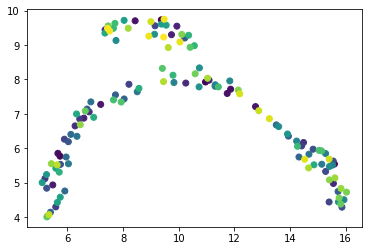

In [219]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.arange(len(embedding[:, 0])))

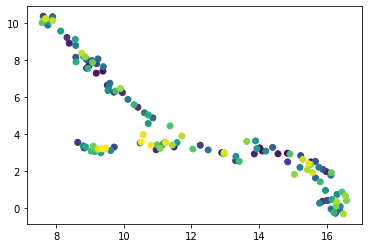

In [222]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.arange(len(embedding[:, 0])))

In [64]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


# model =  PCA(n_components=2, random_state=0)
# model =  TSNE(n_components=2, perplexity=10, random_state=0)
model = umap.UMAP(random_state=0)
embedding = model.fit_transform(feat_arr)

plt.plot(embedding[:, 0], embedding[:, 1], '.k', markersize=10)

KeyboardInterrupt: 

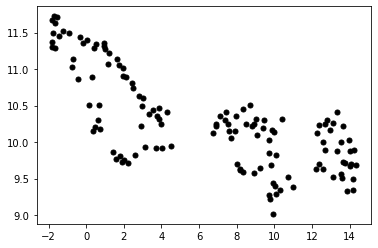

In [194]:
## generate new samples of all time series, then re-embed
## see which cluster distinctions persist across series.
## Can also create "sliding" windows from one long time series with tsfresh
## Filter out any features that fluctuate too rapidly. Only integral features are really useful
## The UMAP should vary barely and smoothly with window, not jump erratically

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


# model =  PCA(n_components=2)
# model =  TSNE(n_components=2, perplexity=10, random_state=0)
model = umap.UMAP(random_state=0)
embedding = model.fit_transform(feat_arr)

plt.plot(embedding[:, 0], embedding[:, 1], '.k', markersize=10)

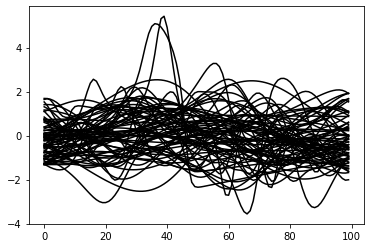

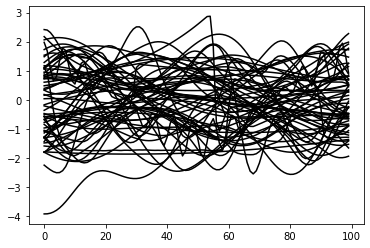

In [168]:
group1_bool = ((embedding[:, 0] + embedding[:, 1]) > 12)

plt.figure()
plt.plot(all_series[group1_bool][:, :100].T, 'k');

plt.figure()
plt.plot(all_series[~group1_bool][:, :100].T, 'k');

In [172]:
from scipy.stats import spearmanr

top_features = list()
for i, feats in enumerate(feat_arr.T):
    max_corr = max(
        np.abs(spearmanr(embedding[:, 0] + embedding[:, 1], feats).correlation),
        np.abs(spearmanr(embedding[:, 0] + embedding[:, 1], feats).correlation)
       )
    if max_corr > 0.5:
        top_features.append((i, feat_names[i], max_corr))
sort_inds = np.argsort([item[2] for item in top_features])[::-1].astype(int)
top_features = np.array(top_features)[sort_inds]
print(top_features[:10])

[['622' 'value__fft_aggregated__aggtype_"variance"' '0.9937917044787273']
 ['624' 'value__fft_aggregated__aggtype_"kurtosis"' '0.9430950728660652']
 ['623' 'value__fft_aggregated__aggtype_"skew"' '0.8482570864250254']
 ['621' 'value__fft_aggregated__aggtype_"centroid"' '0.8245662734212352']
 ['516' 'value__fft_coefficient__attr_"abs"__coeff_95'
  '0.5509528639299632']
 ['515' 'value__fft_coefficient__attr_"abs"__coeff_94'
  '0.5404953824801153']
 ['520' 'value__fft_coefficient__attr_"abs"__coeff_99'
  '0.5162120322425666']
 ['519' 'value__fft_coefficient__attr_"abs"__coeff_98'
  '0.5098596060428122']]


In [176]:
from nolds import dfa, hurst_rs, sampen, corr_dim

all_dfa = np.array([dfa(item) for item in all_series])
all_hurst = np.array([hurst_rs(item) for item in all_series])
all_sampen = np.array([sampen(item) for item in all_series])
# all_sampen = np.array([corr_dim(item, 5) for item in all_series])

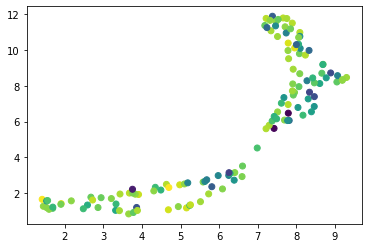

In [181]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=all_dfa)

<ipython-input-146-a55336a2a0fc>:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(minmag))


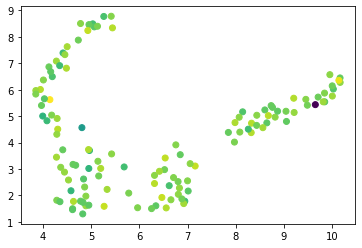

In [146]:

plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(minmag))

<ipython-input-15-f22f9d511368>:8: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(lyaps))


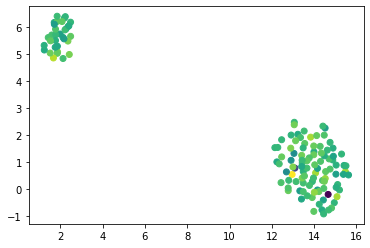

In [15]:
# names = np.array(list(data.keys()))
# lyaps = np.array([getattr(dysts.flows, item)().maximum_lyapunov_estimated for item in data])
# kydims = [getattr(dysts.flows, item)().kaplan_yorke_dimension for item in data]
# cdims = [getattr(dysts.flows, item)().correlation_dimension for item in data]
# minmag = [np.min(np.abs(getattr(dysts.flows, item)().lyapunov_spectrum_estimated)) for item in data]
# dtvals = np.array([getattr(dysts.flows, item)().dt for item in data])
# periods = np.array([getattr(dysts.flows, item)().period for item in data])
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(lyaps))

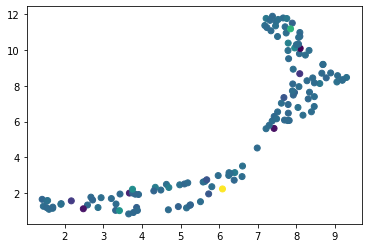

In [169]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=feat_arr[:, 7])

In [131]:
hurst_rs(all_series[0])

0.39927246177037

In [146]:
np.abs(spearmanr(embedding[:, 0], all_dfa).correlation)

0.30877595686755993

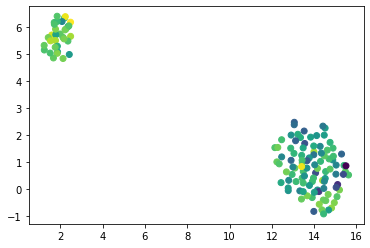

In [147]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=all_dfa)

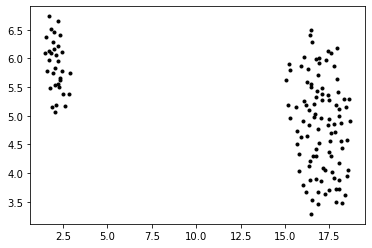

In [102]:

model = umap.UMAP()
embedding = model.fit_transform(feat_arr)

plt.plot(embedding[:, 0], embedding[:, 1], '.k')

In [46]:
series_pd

,id,time,value
0,11.0,0.0,0.607279
1,11.0,1.0,0.710913
2,11.0,2.0,0.884983
3,11.0,3.0,1.156696
4,11.0,4.0,1.535859
...,...,...,...
145,11.0,145.0,-1.124033
146,11.0,146.0,-0.724464
147,11.0,147.0,-0.440211
148,11.0,148.0,-0.278864
